# Telco Customer Churn
Focused customer retention programs

#### Attribute Information:
The raw data contains 7043 rows (customers) and 21 columns (features).The “Churn” column is our target.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

### Objective
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

In [1]:
# Importing all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data from a .csv file into the dataframe 'df'.
df = pd.read_csv('Telco-Customer-Churn.csv')

# This displays the first five rows of the dataset.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis

#### Inspecting the Data

In [60]:
# Prints the summary of dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation
1. The customerID is considered an object because it contains both letters and numbers, making it a string.
2. Based on the information and data, the "TotalCharges" should be a 'float' instead of an 'object'.

[Q] Why is the data type of the "TotalCharges" column an object?

[A] The "TotalCharges" column has some blank values, which appear because these customers have been with the service for 0 months. These blank values should be changed to either 0 or null.

#### Handling the missing values.

In [4]:
# Replacing the blank values in the "TotalCharges" column with zeros and changing the data type to float.
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
# Verify if the changes are updated successfully.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check if the dataframe contains any null values.
df.isnull().sum().sum()

0

In [7]:
# Now, let's generate descriptive statistics for the dataframe.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Checking for Duplicates

In [8]:
# Let's check if there are any duplicate values in the dataframe. 
# We can look for duplicates across all rows, or we can check for duplicates in a specific column. 
# Since "customerID" is a unique column, we will check for duplicates in this column.

df["customerID"].duplicated().sum()

0

In [9]:
# Also the SeniorCitizen Column contains int64 datatype which is nothing but 0(not Senior Citizen) and 1(is Senior Citizen).
# It would be easier to understand if the datatype would be object(Yes/No).
# Let's create a functions which changes the one's and zero's to yes and no.

def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

# Now apply this function in the SeniorCitizen column
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#### Now let's try to figure out why some customers decided to churn out, but before that lets see how many customers have churned out.

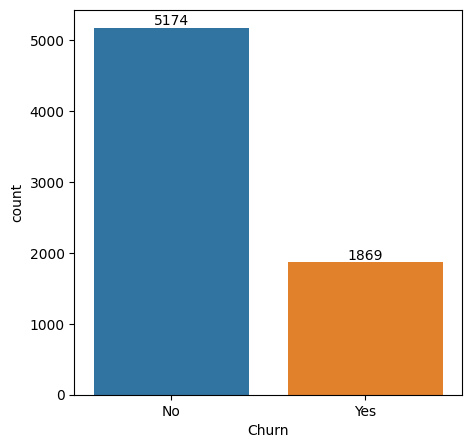

In [10]:
plt.figure(figsize=(5,5))
abc = sns.countplot(x = 'Churn', data = df)
abc.bar_label(abc.containers[0])
plt.show()

# abc.containers[0]: In a countplot, the bars are organized into containers, and 
# abc.containers[0] refers to the first container that holds the bars for each category in 'Churn'.
# abc.bar_label(...): This method adds labels to the bars in the plot. 
# It takes the container of the bars and places the corresponding values (counts) on top of each bar.

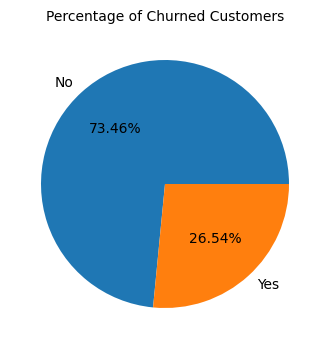

In [11]:
# Creating pie chart of churned customers
plt.figure(figsize=(4,5))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

<b>Observation</b>

So out of 7043 customers, 1869 customers or 26.54% of customers have churned out. 

Now lets see the customers who churned out based on the features like gender, Senior Citizen, etc.

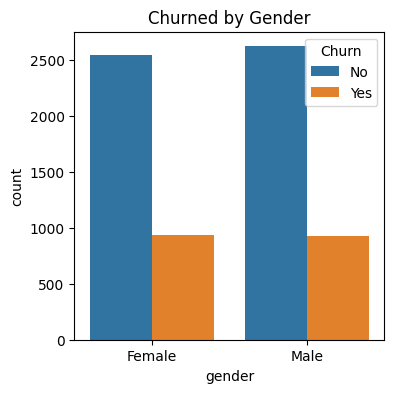

In [12]:
# Countplot of churned customers based on gender.
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = 'Churn')
plt.title("Churned by Gender")
plt.show()

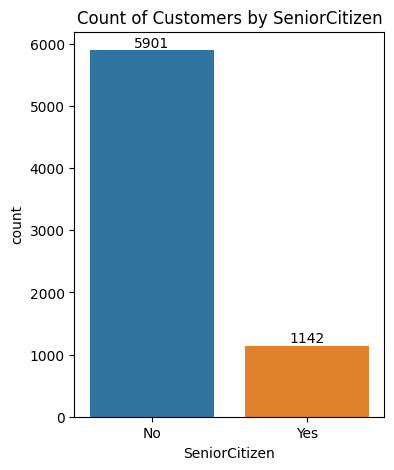

In [13]:
# Countplot of churned customers based on SeniorCitizen.
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

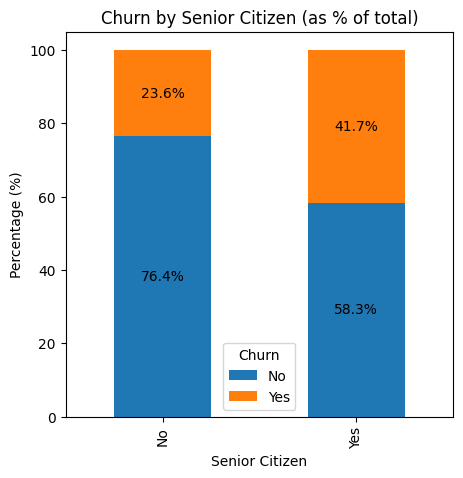

In [14]:
# Calculate the percentage of Churn within each SeniorCitizen group
pivot_df = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value = 0)
pivot_df_percent = pivot_df.divide(pivot_df.sum(axis = 1), axis = 0) * 100

# Create the stacked bar chart
ax = pivot_df_percent.plot(kind = 'bar', stacked = True, figsize = (5,5))

# Add labels on the bars to show percentage
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Annotate with percentage
    ax.annotate(f'{height:.1f}%', (x, y), ha = 'center', va = 'center')

plt.title("Churn by Senior Citizen (as % of total)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.show()

From the above two plots of senior citizens, we can observe that greater percentage of senior citizens have churned out.

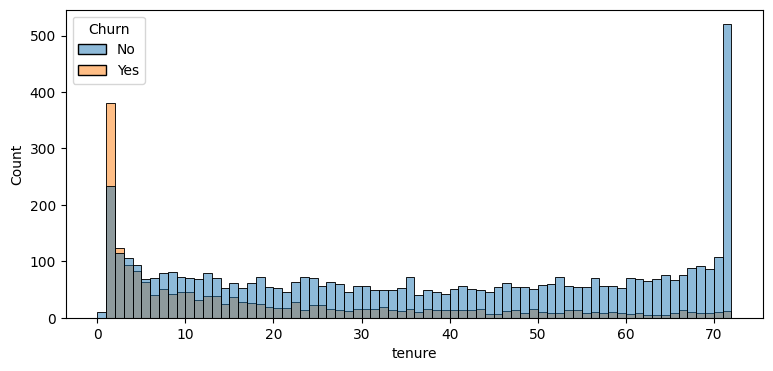

In [15]:
# Histplot of churned customers based on tenure.
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

Based on the above plot, customers have churned out in the intital months but the customers who stayed for longer duration didnt churned out.

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

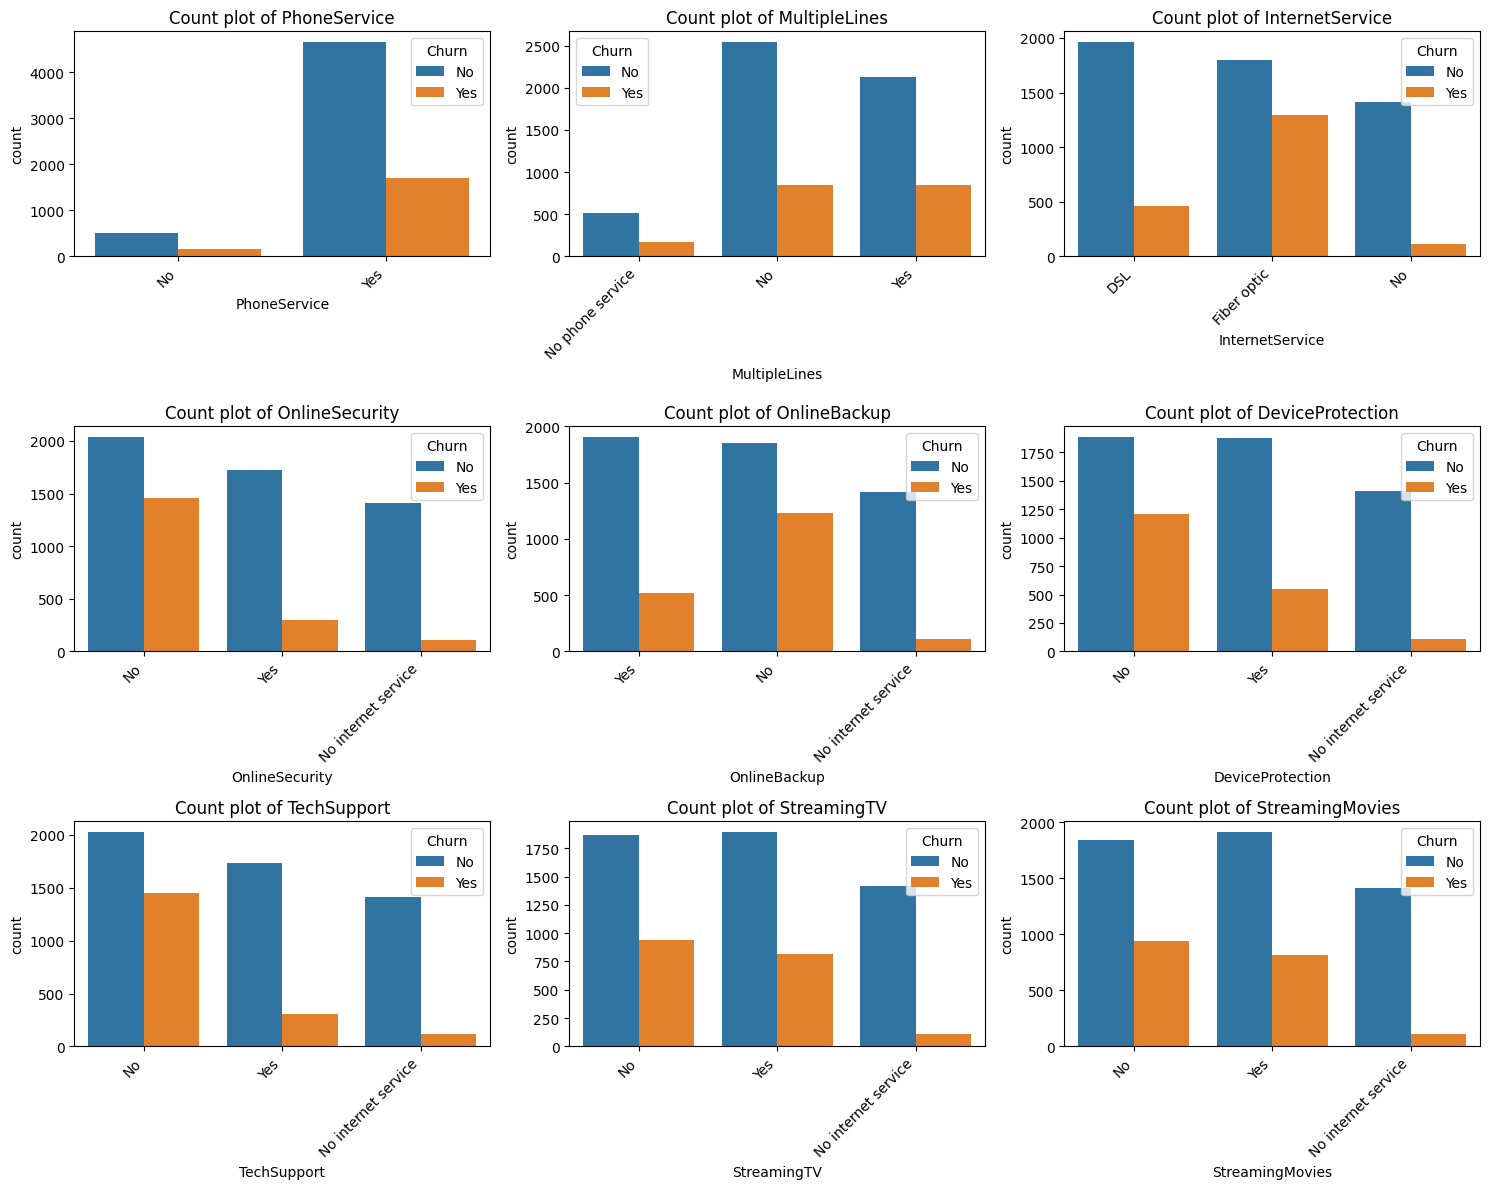

In [18]:
# As per the above column values, from PhoneService till StreamingMovies are the services which are used by the customers.
# So here we can use subplot to generate multiple countplots.

# List of column names to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies']

# Set up the subplot grid (3 rows and 3 columns for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten axes array to iterate over easily
axes = axes.flatten()

# Generate the count plots for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Observation - Services like OnlineSecurity, TechSupport, and Streaming options show a higher proportion of churn among customers who lack these services. The presence of fiber optic internet appears to correlate with a higher churn rate compared to DSL.

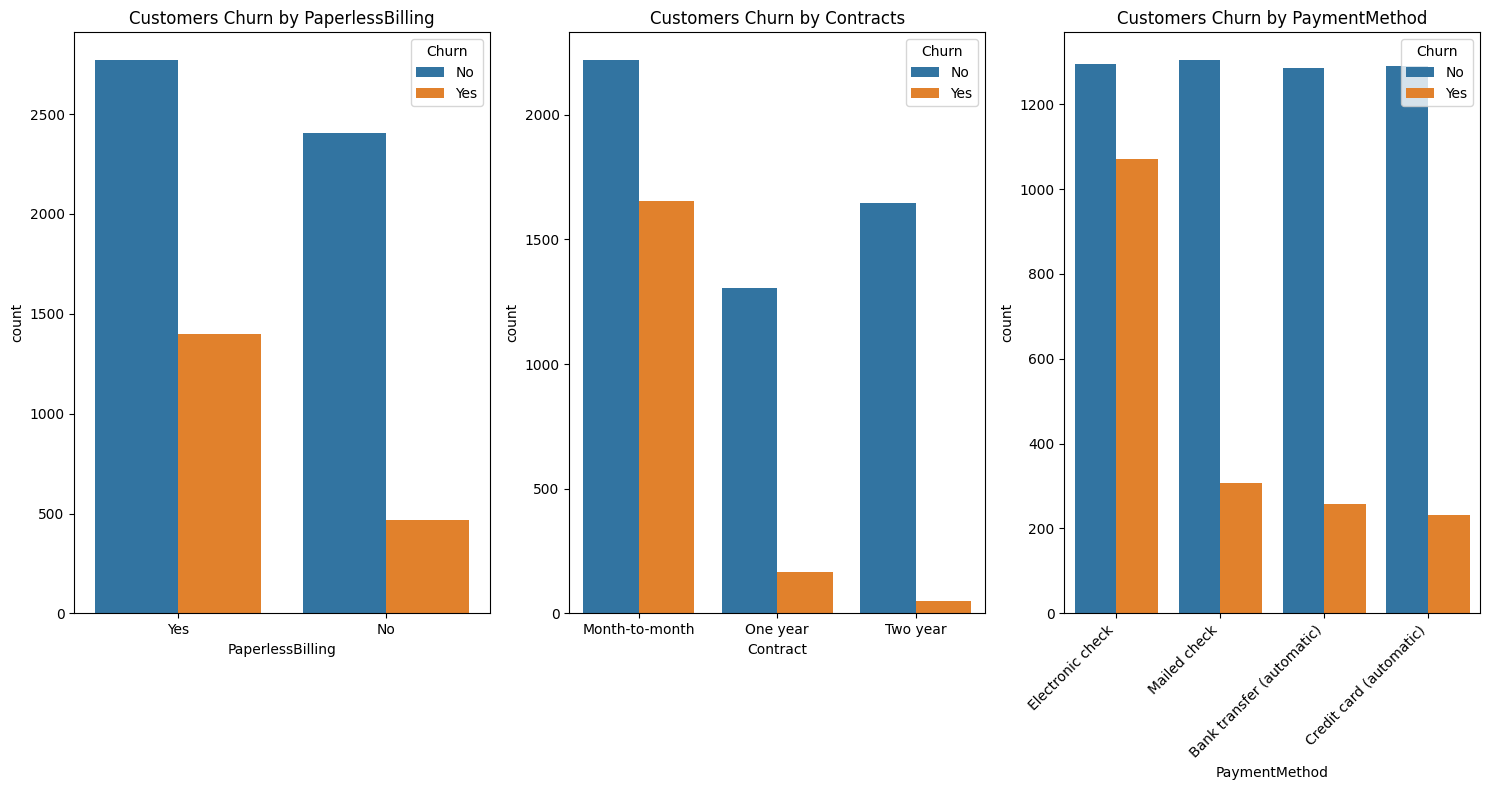

In [59]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# First countplot for PaperlessBilling
ax = sns.countplot(x = "PaperlessBilling", data = df, hue='Churn', ax=axes[0])
axes[0].set_title("Customers Churn by PaperlessBilling")

# Second countplot for Contract
ax = sns.countplot(x = "Contract", data = df, hue='Churn', ax=axes[1])
axes[1].set_title("Customers Churn by Contracts")

# Third countplot for MonthlyCharges
ax = sns.countplot(x = "PaymentMethod", data = df, hue='Churn', ax=axes[2])
axes[2].set_title("Customers Churn by PaymentMethod")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Observation - Customers with a month-to-month contract, who use Paperless Billing and pay via Electronic Check, are more likely to churn.

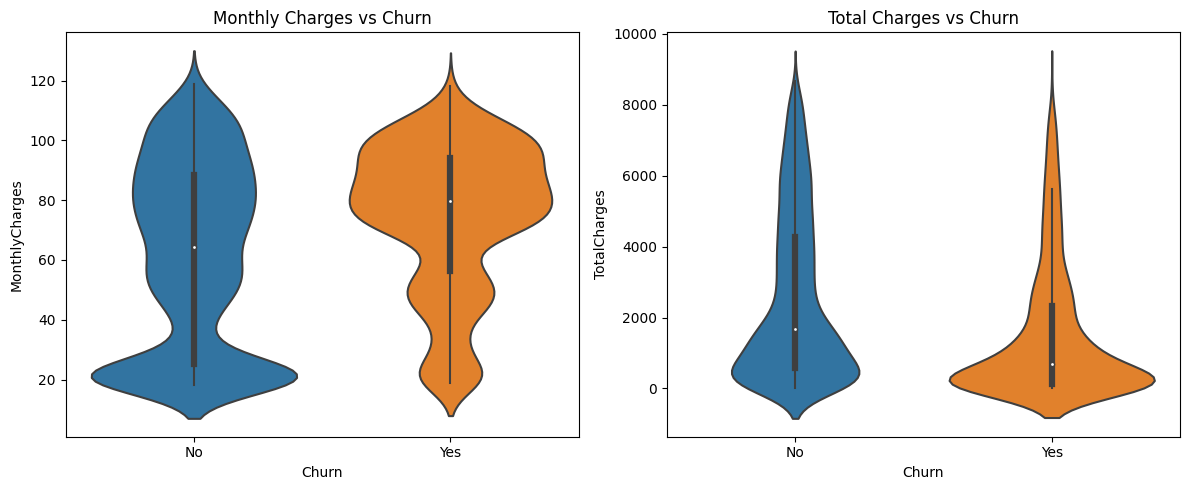

In [43]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First violin plot for MonthlyCharges
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])
axes[0].set_title("Monthly Charges vs Churn")

# Second violin plot for TotalCharges
sns.violinplot(x='Churn', y='TotalCharges', data=df, ax=axes[1])
axes[1].set_title("Total Charges vs Churn")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Observation - The violin plots show that customers with higher MonthlyCharges and lower TotalCharges tend to have a higher likelihood of churn. This indicates that higher monthly costs and shorter customer relationships might contribute to churn.